# Data Preprocessing

In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('tugas5_genap.csv')

In [3]:
df.head()

,ID,Age,Gender,Hypertension,Heart Disease,Ever Married,Work Type,Residence Type,Average Glucose Level,BMI,...,Dietary Habits,Alcohol Consumption,Chronic Stress,Sleep Hours,Family History of Stroke,Education Level,Income Level,Stroke Risk Score,Region,Stroke Occurrence
0,1,78,Female,0,0,1,Private,Rural,267.30,36.2,...,Non-Vegetarian,0,0,11,0,Tertiary,Middle,88,South,0
1,2,60,Female,0,0,0,Private,Rural,207.24,19.8,...,Vegetarian,0,0,9,0,Secondary,High,56,East,0
2,3,69,Male,0,0,0,Private,Urban,161.30,34.5,...,Mixed,1,0,3,0,Secondary,High,63,North,1
3,4,43,Male,0,0,1,Never Worked,Urban,247.49,48.8,...,Mixed,0,1,4,0,Tertiary,Middle,93,South,0
4,5,30,Female,0,0,1,Government,Urban,116.57,31.3,...,Mixed,0,1,9,0,Secondary,High,99,West,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172000 entries, 0 to 171999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        172000 non-null  int64  
 1   Age                       172000 non-null  int64  
 2   Gender                    172000 non-null  object 
 3   Hypertension              172000 non-null  int64  
 4   Heart Disease             172000 non-null  int64  
 5   Ever Married              172000 non-null  int64  
 6   Work Type                 172000 non-null  object 
 7   Residence Type            172000 non-null  object 
 8   Average Glucose Level     172000 non-null  float64
 9   BMI                       172000 non-null  float64
 10  Smoking Status            172000 non-null  object 
 11  Physical Activity         172000 non-null  object 
 12  Dietary Habits            172000 non-null  object 
 13  Alcohol Consumption       172000 non-null  i

In [5]:
df.columns.tolist()

['ID',
 'Age',
 'Gender',
 'Hypertension',
 'Heart Disease',
 'Ever Married',
 'Work Type',
 'Residence Type',
 'Average Glucose Level',
 'BMI',
 'Smoking Status',
 'Physical Activity',
 'Dietary Habits',
 'Alcohol Consumption',
 'Chronic Stress',
 'Sleep Hours',
 'Family History of Stroke',
 'Education Level',
 'Income Level',
 'Stroke Risk Score',
 'Region',
 'Stroke Occurrence']

In [6]:
df.isnull().sum()

ID                          0
Age                         0
Gender                      0
Hypertension                0
Heart Disease               0
Ever Married                0
Work Type                   0
Residence Type              0
Average Glucose Level       0
BMI                         0
Smoking Status              0
Physical Activity           0
Dietary Habits              0
Alcohol Consumption         0
Chronic Stress              0
Sleep Hours                 0
Family History of Stroke    0
Education Level             0
Income Level                0
Stroke Risk Score           0
Region                      0
Stroke Occurrence           0
dtype: int64

In [7]:
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        df[column].fillna(df[column].median(), inplace=True)
    else:
        df[column].fillna(df[column].mode()[0], inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10764\4229638522.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10764\4229638522.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [8]:
df.isnull().sum()

ID                          0
Age                         0
Gender                      0
Hypertension                0
Heart Disease               0
Ever Married                0
Work Type                   0
Residence Type              0
Average Glucose Level       0
BMI                         0
Smoking Status              0
Physical Activity           0
Dietary Habits              0
Alcohol Consumption         0
Chronic Stress              0
Sleep Hours                 0
Family History of Stroke    0
Education Level             0
Income Level                0
Stroke Risk Score           0
Region                      0
Stroke Occurrence           0
dtype: int64

In [9]:
print("\nNumber of duplicate rows :", df.duplicated().sum())


Number of duplicate rows : 0


In [10]:
print("\nNumber of duplicate IDs :", df['ID'].duplicated().sum())


Number of duplicate IDs : 0


In [11]:
categorical_columns = ['Gender', 'Work Type', 'Residence Type', 'Smoking Status', 'Physical Activity', 
                      'Dietary Habits', 'Education Level', 'Income Level', 'Region']
le = LabelEncoder()
for column in categorical_columns:
    df[column] = le.fit_transform(df[column])

In [13]:
df.head()

,ID,Age,Gender,Hypertension,Heart Disease,Ever Married,Work Type,Residence Type,Average Glucose Level,BMI,...,Dietary Habits,Alcohol Consumption,Chronic Stress,Sleep Hours,Family History of Stroke,Education Level,Income Level,Stroke Risk Score,Region,Stroke Occurrence
0,1,78,0,0,0,1,3,0,267.30,36.2,...,1,0,0,11,0,3,2,88,2,0
1,2,60,0,0,0,0,3,0,207.24,19.8,...,2,0,0,9,0,2,0,56,0,0
2,3,69,1,0,0,0,3,1,161.30,34.5,...,0,1,0,3,0,2,0,63,1,1
3,4,43,1,0,0,1,2,1,247.49,48.8,...,0,0,1,4,0,3,2,93,2,0
4,5,30,0,0,0,1,1,1,116.57,31.3,...,0,0,1,9,0,2,0,99,3,0


In [14]:
numeric_columns = ['Age', 'Average Glucose Level', 'BMI', 'Sleep Hours', 'Stroke Risk Score']
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [15]:
df.head(10)

,ID,Age,Gender,Hypertension,Heart Disease,Ever Married,Work Type,Residence Type,Average Glucose Level,BMI,...,Dietary Habits,Alcohol Consumption,Chronic Stress,Sleep Hours,Family History of Stroke,Education Level,Income Level,Stroke Risk Score,Region,Stroke Occurrence
0,1,1.138254,0,0,0,1,3,0,1.242103,0.534747,...,1,0,0,1.217242,0,3,2,1.293164,2,0
1,2,0.284214,0,0,0,0,3,0,0.336411,-0.882672,...,2,0,0,0.521631,0,2,0,0.186149,0,0
2,3,0.711234,1,0,0,0,3,1,-0.356355,0.387820,...,0,1,0,-1.565201,0,2,0,0.428308,1,1
3,4,-0.522380,1,0,0,1,2,1,0.943373,1.623740,...,0,0,1,-1.217396,0,3,2,1.466135,2,0
4,5,-1.139186,0,0,0,1,1,1,-1.030874,0.111250,...,0,0,1,0.521631,0,2,0,1.673700,3,0
5,6,-0.047913,1,1,0,1,1,1,0.538179,1.718811,...,1,0,1,-0.173980,0,0,1,0.186149,1,0
6,7,1.375487,0,0,0,0,0,1,0.126500,1.450884,...,2,0,0,-0.869591,0,2,0,1.258570,2,0
7,8,-0.522380,0,0,0,0,2,1,0.205971,-0.580174,...,0,0,0,0.869437,0,1,1,-1.578156,1,0
8,9,0.379107,1,1,0,0,0,0,-1.012175,-1.167884,...,1,1,0,0.173826,1,2,1,1.639106,0,0
9,10,-0.901953,1,0,0,0,1,1,1.570692,0.603890,...,2,0,0,0.173826,0,3,2,1.500729,0,0


In [ ]:
numeric_columns = ['Age', 'Average Glucose Level', 'BMI', 'Sleep Hours', 'Stroke Risk Score']
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# K-Means Clustering

In [17]:
X = df.drop('ID', axis=1)

## 1. Elbow Method

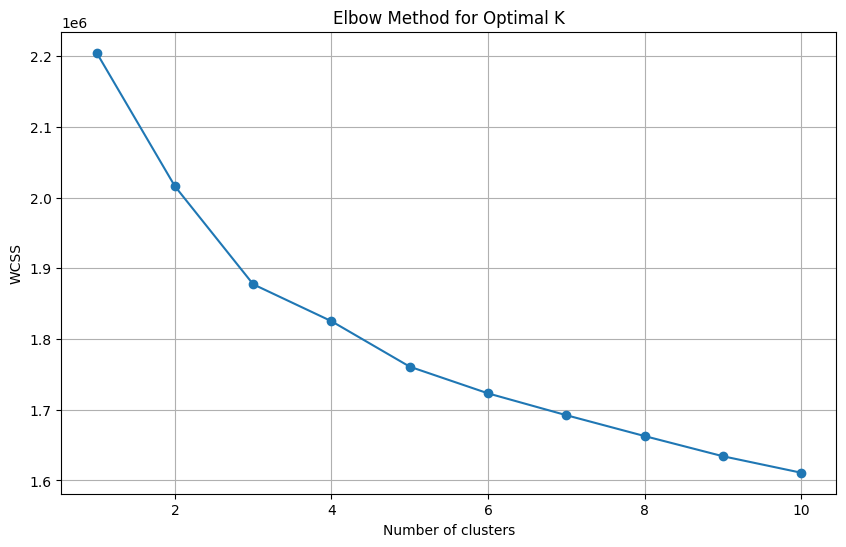

In [18]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow_plot.png')
plt.grid(True)
plt.show()
plt.close()

## 2. Silhouette Score

Clusters: 2, Silhouette Score: 0.0987, Structure: No Structure
Clusters: 3, Silhouette Score: 0.0832, Structure: No Structure
Clusters: 4, Silhouette Score: 0.0648, Structure: No Structure
Clusters: 5, Silhouette Score: 0.0643, Structure: No Structure
Clusters: 6, Silhouette Score: 0.0584, Structure: No Structure
Clusters: 7, Silhouette Score: 0.0548, Structure: No Structure
Clusters: 8, Silhouette Score: 0.0569, Structure: No Structure
Clusters: 9, Silhouette Score: 0.0542, Structure: No Structure
Clusters: 10, Silhouette Score: 0.0545, Structure: No Structure


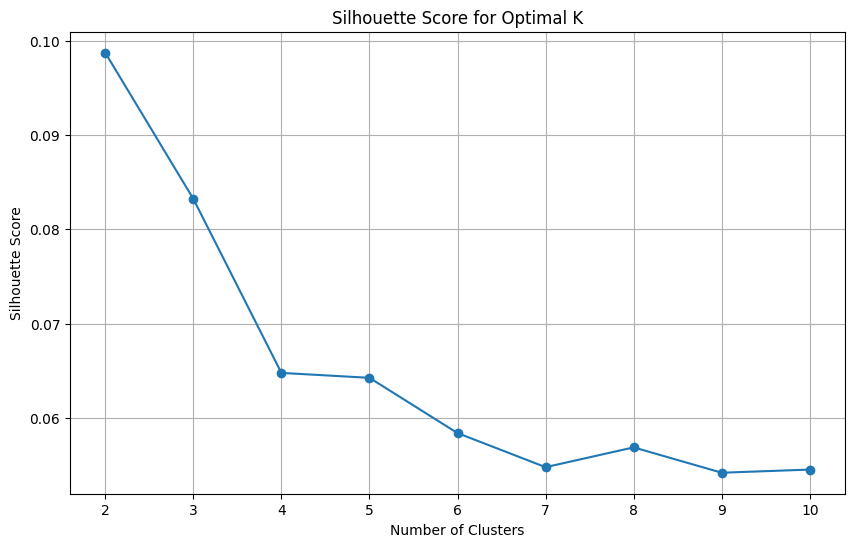

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

silhouette_scores = []
for i in range(2, 11): 
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)
    
    if score > 0.7:
        structure = "Strong Structure"
    elif score > 0.5:
        structure = "Medium Structure"
    elif score > 0.25:
        structure = "Weak Structure"
    else:
        structure = "No Structure"
    print(f"Clusters: {i}, Silhouette Score: {score:.4f}, Structure: {structure}")

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.savefig('silhouette_plot.png')
plt.show()
plt.close()

## 3. Gap Statistic

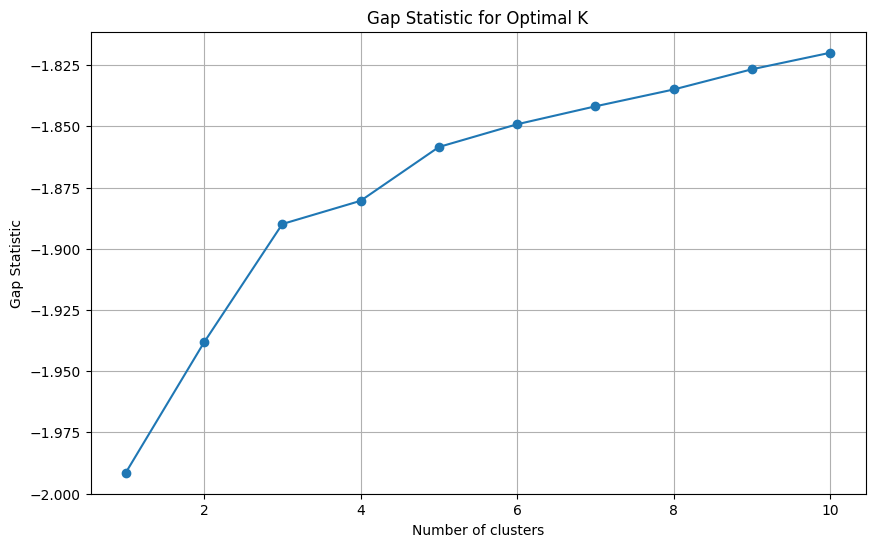

In [ ]:
def gap_statistic(X, n_refs=3, max_clusters=10):
    gaps = np.zeros((max_clusters,))
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
        kmeans.fit(X)
        Wk = np.log(kmeans.inertia_)
        ref_disps = np.zeros(n_refs)
        for i in range(n_refs):
            random_reference = np.random.random_sample(size=X.shape)
            kmeans.fit(random_reference)
            ref_disps[i] = np.log(kmeans.inertia_)
        gap = np.mean(ref_disps) - Wk
        gaps[k - 1] = gap
    return gaps

max_clusters = 10
gaps = gap_statistic(X, n_refs=5, max_clusters=max_clusters)

plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), gaps, marker='o')
plt.title('Gap Statistic for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('Gap Statistic')
plt.savefig('gap_statistic_plot.png')
plt.grid(True)
plt.show()
plt.close()

In [ ]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(X)

In [ ]:
df['Cluster'] = cluster_labels

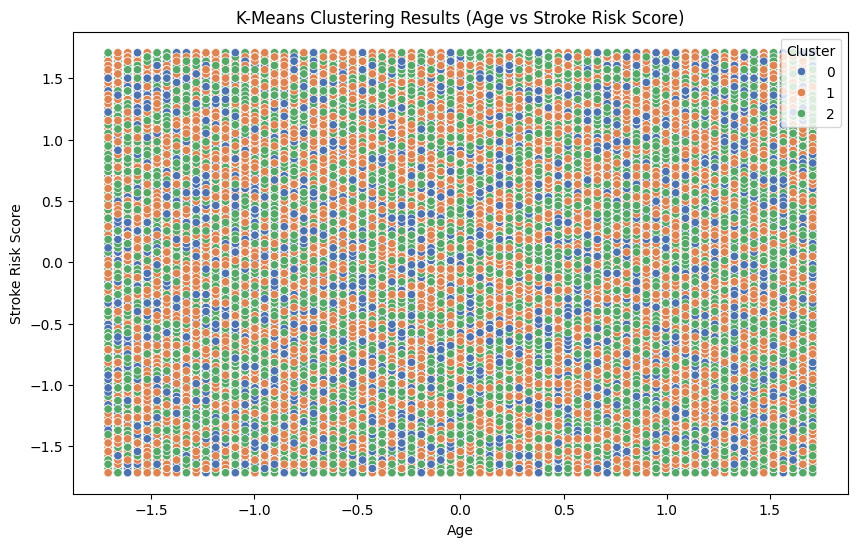

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Stroke Risk Score', hue='Cluster', palette='deep')
plt.title('K-Means Clustering Results (Age vs Stroke Risk Score)')
plt.savefig('cluster_scatter_plot.png')
plt.show()
plt.close()

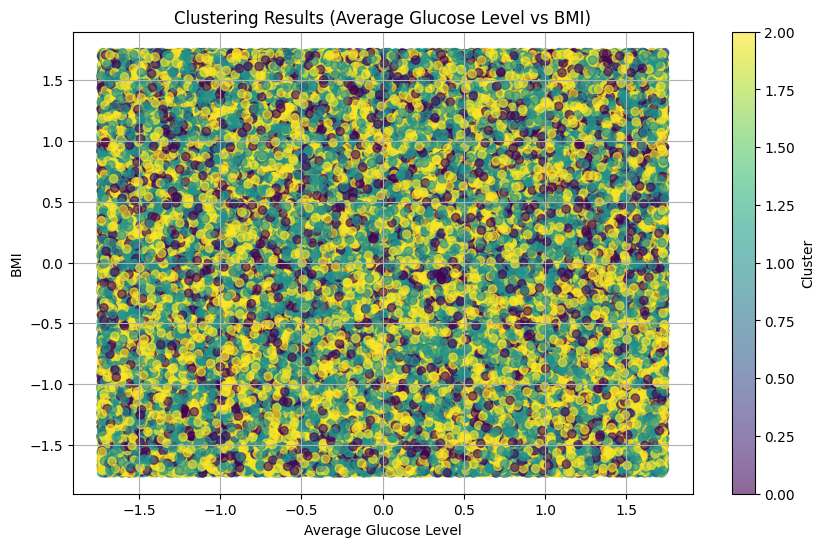

<Figure size 640x480 with 0 Axes>

In [ ]:
x = df['Average Glucose Level']
y = df['BMI']
clusters = df['Cluster']

plt.figure(figsize=(10, 6))
scatter = plt.scatter(x, y, c=clusters, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('Average Glucose Level')
plt.ylabel('BMI')
plt.title('Clustering Results (Average Glucose Level vs BMI)')
plt.grid(True)

plt.show()
plt.savefig('cluster_scatter_plot2.png')

In [ ]:
print("\nCluster Analysis:")
for cluster in range(optimal_k):
    print(f"\nCluster {cluster} Characteristics:")
    cluster_data = df[df['Cluster'] == cluster]
    for col in numeric_columns:
        print(f"Average {col}: {cluster_data[col].mean():.3f}")
    for col in categorical_columns:
        mode_val = cluster_data[col].mode()[0]
        print(f"Most common {col}: {mode_val}")


Cluster Analysis:

Cluster 0 Characteristics:
Average Age: -0.004
Average Average Glucose Level: -0.003
Average BMI: 0.009
Average Sleep Hours: -0.008
Average Stroke Risk Score: 0.001
Most common Gender: 1
Most common Work Type: 0
Most common Residence Type: 1
Most common Smoking Status: 1
Most common Physical Activity: 3
Most common Dietary Habits: 1
Most common Education Level: 2
Most common Income Level: 1
Most common Region: 0

Cluster 1 Characteristics:
Average Age: -0.001
Average Average Glucose Level: -0.002
Average BMI: 0.005
Average Sleep Hours: -0.002
Average Stroke Risk Score: -0.003
Most common Gender: 1
Most common Work Type: 3
Most common Residence Type: 0
Most common Smoking Status: 1
Most common Physical Activity: 3
Most common Dietary Habits: 1
Most common Education Level: 2
Most common Income Level: 1
Most common Region: 1

Cluster 2 Characteristics:
Average Age: 0.003
Average Average Glucose Level: 0.003
Average BMI: -0.009
Average Sleep Hours: 0.006
Average Stroke 

# DBSCAN Clustering

In [26]:
X_scaled = scaler.fit_transform(X)

In [ ]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], s=50, alpha=0.6)
plt.title('t-SNE Visualization of Data Before Clustering')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.show()
plt.savefig('tsne_visualization.png')
plt.close()

In [ ]:
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors.kneighbors(X_scaled)

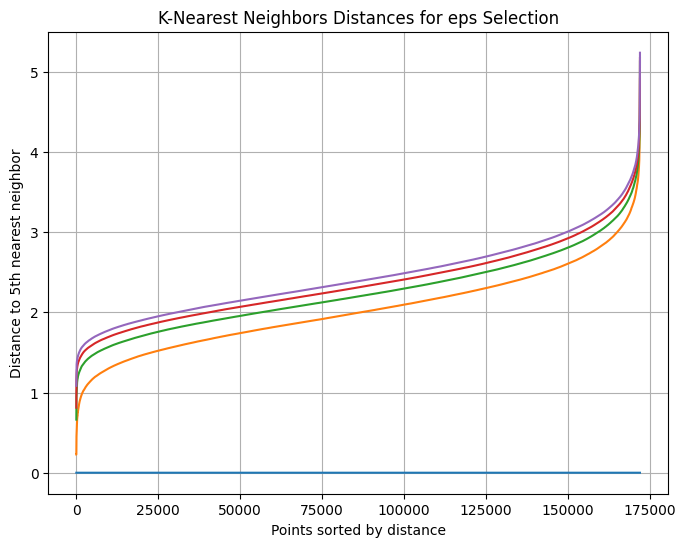

In [ ]:
distances = np.sort(distances, axis=0)
plt.figure(figsize=(8, 6))
plt.plot(distances)
plt.title('K-Nearest Neighbors Distances for eps Selection')
plt.xlabel('Points sorted by distance')
plt.ylabel('Distance to 5th nearest neighbor')
plt.grid(True)
plt.show()
plt.savefig('knn_distances.png')
plt.close()

In [ ]:
eps_range = [2.5, 3.0] 
min_samples_range = range(3, 9)  
total_points = len(X_scaled)
max_noise_percentage = 30 

best_silhouette = -1
best_dbscan = None
best_labels = None
best_eps = None
best_min_samples = None

print("Testing parameter combinations:")
for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_scaled)
        noise_count = list(labels).count(-1)
        noise_percentage = (noise_count / total_points) * 100
        
        if noise_percentage <= max_noise_percentage and len(np.unique(labels)) > 1:
            score = silhouette_score(X_scaled, labels)
            print(f"eps={eps}, min_samples={min_samples}, Clusters={len(np.unique(labels)) - (1 if -1 in labels else 0)}, Noise={noise_count} ({noise_percentage:.2f}%), Silhouette Score={score:.3f}")
            if score > best_silhouette:
                best_silhouette = score
                best_dbscan = dbscan
                best_labels = labels
                best_eps = eps
                best_min_samples = min_samples

Testing parameter combinations:
eps=2.5, min_samples=3, Clusters=1073, Noise=34233 (19.90%), Silhouette Score=-0.251
eps=2.5, min_samples=4, Clusters=571, Noise=39665 (23.06%), Silhouette Score=-0.235
eps=2.5, min_samples=5, Clusters=347, Noise=44480 (25.86%), Silhouette Score=-0.221
eps=2.5, min_samples=6, Clusters=215, Noise=48702 (28.32%), Silhouette Score=-0.211
eps=3.0, min_samples=3, Clusters=207, Noise=8050 (4.68%), Silhouette Score=-0.103
eps=3.0, min_samples=4, Clusters=115, Noise=9401 (5.47%), Silhouette Score=-0.095
eps=3.0, min_samples=5, Clusters=84, Noise=10644 (6.19%), Silhouette Score=-0.084
eps=3.0, min_samples=6, Clusters=57, Noise=11919 (6.93%), Silhouette Score=-0.065
eps=3.0, min_samples=7, Clusters=38, Noise=13079 (7.60%), Silhouette Score=-0.047
eps=3.0, min_samples=8, Clusters=32, Noise=14123 (8.21%), Silhouette Score=-0.043


In [ ]:
if best_dbscan is None:
    print("No valid clustering results with noise below 30%. Try adjusting eps or min_samples.")
else:
    print("\nBest Clustering Results:")
    print(f"Best eps: {best_eps}")
    print(f"Best min_samples: {best_min_samples}")
    print(f"Number of clusters: {len(np.unique(best_labels)) - (1 if -1 in best_labels else 0)}")
    print(f"Number of noise points: {list(best_labels).count(-1)}")
    print(f"Noise percentage: {(list(best_labels).count(-1) / total_points) * 100:.2f}%")
    print(f"Best silhouette score: {best_silhouette:.3f}")

    np.save('X_scaled.npy', X_scaled)
    np.save('best_labels.npy', best_labels)


Best Clustering Results:
Best eps: 3.0
Best min_samples: 8
Number of clusters: 32
Number of noise points: 14123
Noise percentage: 8.21%
Best silhouette score: -0.043


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

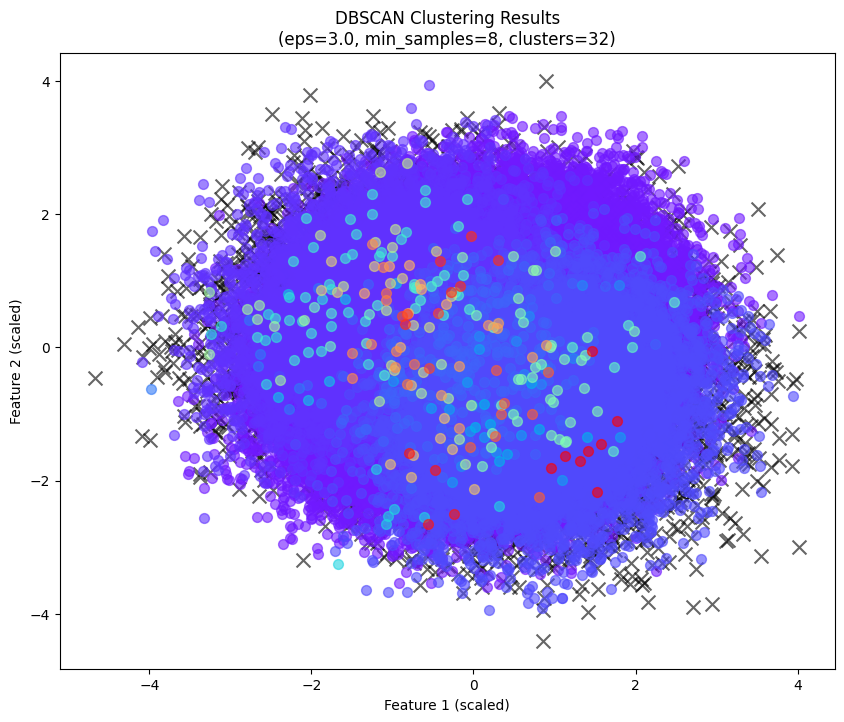

In [ ]:
def visualize_dbscan_clusters(X_scaled, best_labels, eps, min_samples):
    if X_scaled.shape[1] < 2:
        print("Error: X_scaled must have at least 2 features for scatter plot visualization.")
        return

    if X_scaled.shape[1] > 2:
        pca = PCA(n_components=2)
        X_scaled = pca.fit_transform(X_scaled)
    
    n_clusters = len(np.unique(best_labels)) - (1 if -1 in best_labels else 0)
    
    plt.figure(figsize=(10, 8))
    unique_labels = np.unique(best_labels)
    colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))
    
    for label, color in zip(unique_labels, colors):
        if label == -1:  # Noise
            color = 'black'
            marker = 'x'
            label_name = 'Noise'
        else:
            marker = 'o'
            label_name = f'Cluster {label}'
        
        mask = best_labels == label
        plt.scatter(X_scaled[mask, 0], X_scaled[mask, 1], 
                   c=[color], marker=marker, label=label_name, 
                   s=100 if label == -1 else 50, alpha=0.6)
    
    plt.title(f'DBSCAN Clustering Results\n(eps={eps}, min_samples={min_samples}, clusters={n_clusters})')
    plt.xlabel('Feature 1 (scaled)')
    plt.ylabel('Feature 2 (scaled)')
    
    if n_clusters <= 20:
        plt.legend()
    
    plt.show()
    plt.savefig('dbscan_clusters.png')
    plt.close()

if best_dbscan is not None:
    X_scaled = np.load('X_scaled.npy')
    best_labels = np.load('best_labels.npy')
    visualize_dbscan_clusters(X_scaled, best_labels, best_eps, best_min_samples)

==================================================================================================================

# Perbandingan Hasil Clustering K-Means dan DBSCAN

- **Jumlah Kluster Optimal**:
  - K-Means: Menunjukkan 3 kluster berdasarkan metode elbow, skor silhouette, dan statistik gap, meskipun skor silhouette menunjukkan tidak ada struktur yang jelas (semua di bawah 0,25).
  - DBSCAN: Mengidentifikasi 32 kluster dengan eps 3.0 dan min_samples 8, dengan 8,21% titik noise, dan skor silhouette -0,043, menunjukkan pemisahan kluster yang buruk.

- **Visualisasi Kluster**:
  - K-Means: Plot sebaran Tingkat Glukosa Rata-rata vs. BMI menunjukkan tiga kluster yang berbeda dengan beberapa tumpang tindih, menunjukkan pemisahan yang sedang.
  - DBSCAN: Plot sebaran menunjukkan inti yang padat dengan banyak kluster kecil dan noise signifikan (titik 'x' hitam), menunjukkan struktur data yang kompleks tetapi kluster kurang dapat diinterpretasikan.

- **Kelebihan K-Means**:
  - Sederhana dan efisien secara komputasi untuk dataset ini dengan fitur numerik dan kategorikal yang sudah diproses sebelumnya.
  - Memberikan penetapan kluster yang konsisten, berguna untuk menginterpretasikan karakteristik (misalnya, rata-rata Usia, BMI per kluster).
  - Berfungsi baik ketika kluster berbentuk bulat dan berukuran seragam, seperti yang diasumsikan dalam metode elbow.

- **Kekurangan K-Means**:
  - Mengasumsikan kluster berbentuk bulat, yang mungkin tidak sesuai dengan struktur kompleks dataset (skor silhouette rendah menunjukkan kecocokan yang buruk).
  - Sensitif terhadap outlier (di sini sudah dikurangi dengan metode IQR, tetapi masih terbatas oleh jumlah kluster yang tetap).
  - Memerlukan k yang ditentukan sebelumnya, dan metode elbow/silhouette/gap tidak secara jelas mengidentifikasi k optimal.

- **Kelebihan DBSCAN**:
  - Dapat menangani kluster non-bulat dan noise, seperti yang terlihat pada inti padat dan titik noise dalam visualisasi.
  - Secara otomatis menentukan jumlah kluster (32 di sini), menyesuaikan dengan kepadatan data.
  - Tahan terhadap outlier, dengan 8,21% noise yang diidentifikasi secara efektif.

- **Kekurangan DBSCAN**:
  - Penyesuaian parameter (eps, min_samples) sulit; skor silhouette negatif menunjukkan kualitas kluster yang buruk.
  - Jumlah kluster yang tinggi (32) dan noise dapat menyulitkan interpretasi dibandingkan dengan 3 kluster K-Means.
  - Sensitif terhadap skala data dan variasi kepadatan, berpotensi menyebabkan segmentasi berlebihan pada dataset.

- **Kesimpulan**:
  - K-Means memberikan solusi yang lebih sederhana dan mudah diinterpretasikan dengan 3 kluster, cocok jika asumsi bentuk bulat terpenuhi.
  - DBSCAN menangkap struktur yang lebih kompleks tetapi kesulitan dengan pemisahan yang jelas dan interpretasi, kemungkinan karena heterogenitas dataset. Penyesuaian lebih lanjut atau rekayasa fitur dapat meningkatkan hasil DBSCAN.